# Графік автомата

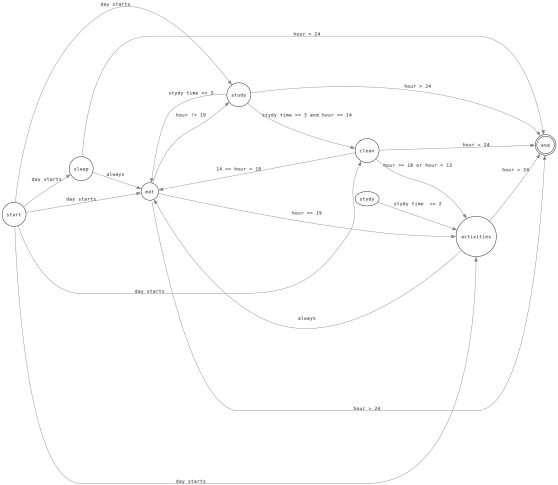

In [1]:
from graphviz import Source
with open("stan.dot", "r") as f:
    gr = Source(f.read())
gr

# Реалізація автомата

In [2]:
import random

In [3]:
def prime(fn):
    def wrapper(*args, **kwargs):
        v = fn(*args, **kwargs)
        v.send(None)
        return v
    return wrapper

In [4]:
class MyDay:
    def __init__(self, hour):
        self.hour = hour
        self.start = self._create_start()

        self.sleep = self._sleep()
        self.eat = self._eat()
        self.study = self._study()
        self.activities = self._activities()
        self.clean = self._clean()

        self.current_state = self.start
        self.stopped = False

    def send(self, message):
        try:
            self.current_state.send(message)
        except StopIteration:
            self.stopped = True
        
    def does_match(self):
        if self.stopped:
            return False
        return self.hour >= 24
    

    @prime
    def _create_start(self):
        while True:
            char = yield
            if 0 <= self.hour <= 8:
                self.current_state = self.sleep
            elif self.hour == 9 or self.hour == 23:
                self.current_state = self.eat
            elif 10 <= self.hour <= 18:
                self.current_state = self.study
            elif 20 <= self.hour <= 22:
                self.current_state = self.activities
            elif self.hour == 19:
                self.current_state = self.clean
            else:
                self.current_state = self.sleep
        

    @prime
    def _sleep(self):
        while True:
            char = yield
            dif = 8 - self.hour
            self.hour = 8
            if dif > 6:
                print("Це був дивовижний сон")
            else:
                print("Чому мене болить голова?")
            self.current_state = self.eat

    @prime
    def _eat(self):
        while True:
            char = yield
            self.hour += 1
            if  self.hour == 8:
                print("На сніданок можна і пюрешку з котлеткою")
            elif self.hour == 19:
                print("Вечеря - це свято")
                self.current_state = self.activities
            if random.random() < 0.5:
                print('Як вдома смачно')
            else:
                print("Що це було?")
            self.current_state = self.study

    @prime
    def _study(self):
        while True:
            char = yield
            time_to_stydy = random.randint(1, 5)
            if time_to_stydy in [1, 2]:
                print("Сьогодні вихідний")
                self.current_state = self.activities
            else:
                print("Навчання - це сила")
                if self.hour == 14:
                    self.current_state = self.eat
                else:
                    self.current_state = self.clean
            self.hour += time_to_stydy


    @prime
    def _clean(self):
        while True:
            char = yield
            time_to_clean = random.randint(1, 2)
            if time_to_clean == 1:
                print("Пилюку повитирав і хватить")
                if 14 <= self.hour < 18:
                    self.current_state = self.eat
                else:
                    self.current_state = self.activities
            else:
                print("Сьогодні плідно попрацював")
                self.current_state = self.eat
            self.hour += time_to_clean


    
    @prime
    def _activities(self):
        while True:
            char = yield
            time_to_activities = random.randint(1, 3)
            if time_to_activities == 1:
                print("На сьогодні тенісу достатньо")
            elif time_to_activities == 2:
                print("Фільм був цікавий")
            else:
                print("Якраз проїхав 50 км на ровері")
            self.hour += time_to_activities
            self.current_state = self.eat


## Приклад роботи

In [7]:
test = MyDay(0)
while not test.does_match():
    test.send(None)
    if test.hour >= 24:
        print(f"Година на даний момент {test.hour - 24}:00")
        print("-----")
        print("Пора спати")
    else:
        print(f"Година на даний момент {test.hour}:00")
    print("-----")

Година на даний момент 0:00
-----
Це був дивовижний сон
Година на даний момент 8:00
-----
Як вдома смачно
Година на даний момент 9:00
-----
Навчання - це сила
Година на даний момент 12:00
-----
Пилюку повитирав і хватить
Година на даний момент 13:00
-----
На сьогодні тенісу достатньо
Година на даний момент 14:00
-----
Як вдома смачно
Година на даний момент 15:00
-----
Навчання - це сила
Година на даний момент 20:00
-----
Пилюку повитирав і хватить
Година на даний момент 21:00
-----
Фільм був цікавий
Година на даний момент 23:00
-----
Що це було?
Година на даний момент 0:00
-----
Пора спати
-----
